<a href="https://colab.research.google.com/github/camilalarrosa/ML_wine_classification/blob/main/ML_wine_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
data = pd.read_csv('/content/sample_data/wine_dataset.csv')

# Data exploration

In [8]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
data.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [10]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

In [11]:
np.unique(data['style'])

array(['red', 'white'], dtype=object)

In [12]:
# data balancing
np.unique(data['style'], return_counts=True) 

(array(['red', 'white'], dtype=object), array([1599, 4898]))

# Treatment of missing values

In [13]:
data.isnull().sum() # hasn't missing values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

# Division between predictors (x) and class (y)

In [14]:
type(data) # confirming if it is in DataFrame format

pandas.core.frame.DataFrame

In [15]:
x_data = data.iloc[:,1:12].values # predictor values (x): all rows, column 1 to 11

In [16]:
x_data # verifying x

array([[ 0.7 ,  0.  ,  1.9 , ...,  0.56,  9.4 ,  5.  ],
       [ 0.88,  0.  ,  2.6 , ...,  0.68,  9.8 ,  5.  ],
       [ 0.76,  0.04,  2.3 , ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 0.24,  0.19,  1.2 , ...,  0.46,  9.4 ,  6.  ],
       [ 0.29,  0.3 ,  1.1 , ...,  0.38, 12.8 ,  7.  ],
       [ 0.21,  0.38,  0.8 , ...,  0.32, 11.8 ,  6.  ]])

In [17]:
type(x_data) # checking the format

numpy.ndarray

In [18]:
y_data = data.iloc[:, 12].values # class: all rows in last column (12)

In [19]:
y_data # verifying y

array(['red', 'red', 'red', ..., 'white', 'white', 'white'], dtype=object)

In [20]:
type(y_data) # checking the format

numpy.ndarray

# Categorical attribute handling

Transforming the categorical attribute "style" (white or red) into a number (0 or 1)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder_style = LabelEncoder()

In [23]:
y_data = label_encoder_style.fit_transform(y_data)

In [24]:
y_data

array([0, 0, 0, ..., 1, 1, 1])

# Escalation of values

that is, leaving the values on the same scale so the algorithms don't think that one parameter is more important than the other because of very different scales

In [25]:
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()
x_data = scaler_data.fit_transform(x_data)

In [26]:
x_data

array([[ 2.18883292, -2.19283252, -0.7447781 , ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 3.28223494, -2.19283252, -0.59764007, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 2.55330026, -1.91755268, -0.66069923, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.6054167 , -0.88525328, -0.89191614, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-0.30169391, -0.12823371, -0.91293585, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.78765037,  0.42232597, -0.97599501, ..., -1.41986693,
         1.09691202,  0.20799905]])

# Splitting the database into training and testing

in this case, setting aside 25% of the data for testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_data_training, x_data_testing, y_data_training, y_data_testing = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

In [29]:
x_data_training.shape , y_data_training.shape

((4872, 11), (4872,))

In [30]:
x_data_testing.shape , y_data_testing.shape

((1625, 11), (1625,))

# Saving preprocessed variables

In [31]:
import pickle

In [32]:
with open('wine_data.pkl', mode = 'wb') as f:
  pickle.dump([x_data_training, y_data_training, x_data_testing, y_data_testing], f)

# Using the SVM model to make the classification prediction

In [33]:
import pickle
with open('wine_data.pkl', 'rb') as f:  
  x_data_training, y_data_training, x_data_testing, y_data_testing = pickle.load(f) # opening the preprocessed data file

In [34]:
from sklearn.svm import SVC # importing the algorithm model

In [35]:
# training the algorithm with the data
svm_data = SVC(C =2, kernel='rbf', random_state=1) 
svm_data.fit(x_data_training, y_data_training)

SVC(C=2, random_state=1)

In [36]:
# making predictions with the model
predictions = svm_data.predict(x_data_testing)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [37]:
y_data_testing # apparently the model is able to predict correctly

array([1, 1, 1, ..., 1, 0, 1])

In [38]:
# Measuring the accuracy of the model:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_data_testing, predictions) *100

# the model can correctly predict 99.69% of the wines

99.6923076923077

In [39]:
from yellowbrick.classifier import ConfusionMatrix

0.9969230769230769

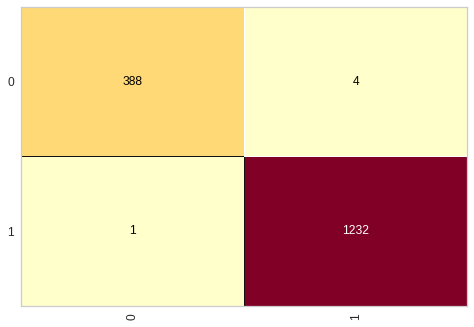

In [40]:
cm = ConfusionMatrix(svm_data)
cm.fit(x_data_training, y_data_training)
cm.score(x_data_testing, y_data_testing)

In [41]:
print(classification_report(y_data_testing, predictions))

# this algorithm is able to identify 100% of the times when the wine is red and when it does, its accuracy is 100%
# it identifies 99% of white wines, and when it does, it is right 100% of the time
# algorithm performs well for both classes (white wine and red wine)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       392
           1       1.00      1.00      1.00      1233

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625

